In [12]:
# 기본 패키지 추가
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd 
import scipy as sp 
import matplotlib as mpl

import statsmodels.api as sm 
import sklearn as sk

from matplotlib import rc
import matplotlib.font_manager as fm 

plt.rcParams['font.family']=['NanumSquareRoundR.ttf']
plt.rcParams['font.size']=12
# plt.rc('font', family ='NanumSquareRoundR')
sns.set(font='Malgun Gothic', rc={'axes.unicode_minus':False}, style='darkgrid')

## 마켓에서 판매할 생선 종류
- 생선종류
    - Bream : 도미
    - Roach : 유럽산 잉어(바퀴벌레아님)
    - Whitefish : 송어
    - Parkki : 곤들매기Abramis bjoerkna
    - Perch : 농어
    - Pike : 강꼬치고기
    - Smelt :빙어

### 도미데이터

In [5]:
# 도미길이,무게 데이터 :35
# 특징(feature)
bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0]
bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]

#### 산점도(상관관계) : scatter plot
- 도미의 길이당 무게의 상관관계

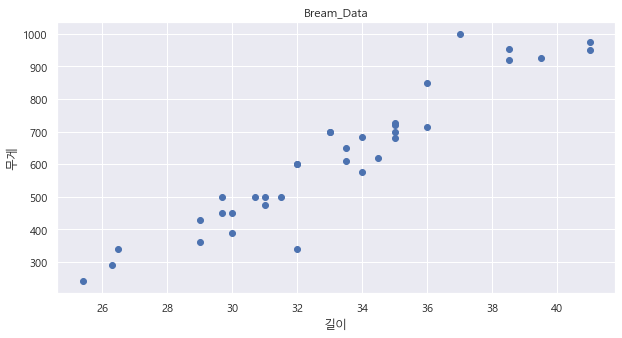

In [15]:
plt.figure(figsize=(10,5)) 
plt.scatter(x=bream_length,y=bream_weight)
plt.title('Bream_Data')
plt.xlabel('길이')
plt.ylabel('무게')
plt.grid(color='white')  #그리드 추가 설정
plt.show()

### Smelt Data

참조 : https://github.com/rickiepark/hg-mldl

In [16]:
#빙어
smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

#### 빙어 scatter (도미와 비교)
- 빙어와 도미 데이터 상관관계 비교

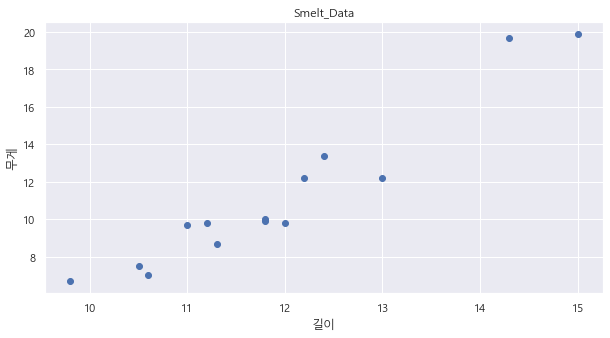

In [17]:
plt.figure(figsize=(10,5)) 
plt.scatter(x=smelt_length,y=smelt_weight)
plt.title('Smelt_Data')
plt.xlabel('길이')
plt.ylabel('무게')
plt.grid(color='white')  #그리드 추가 설정
plt.show()

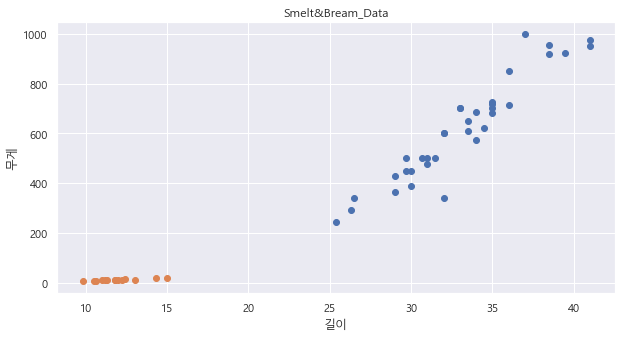

In [21]:
plt.figure(figsize=(10,5)) 
plt.scatter(bream_length, bream_weight)
plt.scatter(smelt_length, smelt_weight)
plt.title('Smelt&Bream_Data')
plt.xlabel('길이')
plt.ylabel('무게')
plt.show()

## ML 시작

### k-최근접 이웃 알고리즘 KNN(K-Nearst Neighbors)

#### 도미&빙어 데이터 결합

In [22]:
fish_length = bream_length + smelt_length
fish_weight = bream_weight + smelt_weight

In [25]:
print(fish_length)
print(fish_weight)

[25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
[242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]


#### 1차원리스트 -> 2차원리스트 변경

In [30]:
fish_data = [[l,w] for l,w in zip(fish_length,fish_weight)]
print(fish_data)

[[25.4, 242.0], [26.3, 290.0], [26.5, 340.0], [29.0, 363.0], [29.0, 430.0], [29.7, 450.0], [29.7, 500.0], [30.0, 390.0], [30.0, 450.0], [30.7, 500.0], [31.0, 475.0], [31.0, 500.0], [31.5, 500.0], [32.0, 340.0], [32.0, 600.0], [32.0, 600.0], [33.0, 700.0], [33.0, 700.0], [33.5, 610.0], [33.5, 650.0], [34.0, 575.0], [34.0, 685.0], [34.5, 620.0], [35.0, 680.0], [35.0, 700.0], [35.0, 725.0], [35.0, 720.0], [36.0, 714.0], [36.0, 850.0], [37.0, 1000.0], [38.5, 920.0], [38.5, 955.0], [39.5, 925.0], [41.0, 975.0], [41.0, 950.0], [9.8, 6.7], [10.5, 7.5], [10.6, 7.0], [11.0, 9.7], [11.2, 9.8], [11.3, 8.7], [11.8, 10.0], [11.8, 9.9], [12.0, 9.8], [12.2, 12.2], [12.4, 13.4], [13.0, 12.2], [14.3, 19.7], [15.0, 19.9]]


In [31]:
#pandas dataframe
df=pd.DataFrame(fish_data)
df.head()

,0,1
0,25.4,242.0
1,26.3,290.0
2,26.5,340.0
3,29.0,363.0
4,29.0,430.0


#### df - seaborn scatter plot

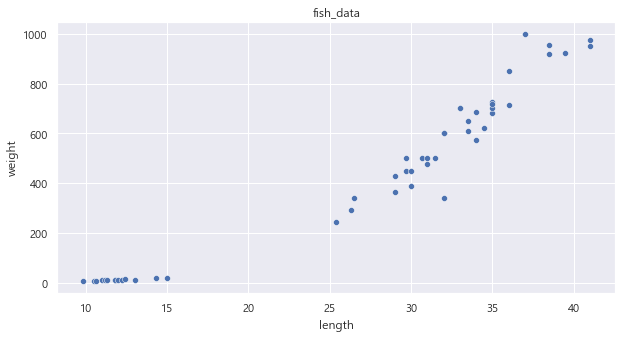

In [33]:
plt.figure(figsize=(10,5))
ax = sns.scatterplot(data=df, x=0,y=1)
plt.title('fish_data')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [32]:
#numpy로 사용
df.to_numpy()

array([[  25.4,  242. ],
       [  26.3,  290. ],
       [  26.5,  340. ],
       [  29. ,  363. ],
       [  29. ,  430. ],
       [  29.7,  450. ],
       [  29.7,  500. ],
       [  30. ,  390. ],
       [  30. ,  450. ],
       [  30.7,  500. ],
       [  31. ,  475. ],
       [  31. ,  500. ],
       [  31.5,  500. ],
       [  32. ,  340. ],
       [  32. ,  600. ],
       [  32. ,  600. ],
       [  33. ,  700. ],
       [  33. ,  700. ],
       [  33.5,  610. ],
       [  33.5,  650. ],
       [  34. ,  575. ],
       [  34. ,  685. ],
       [  34.5,  620. ],
       [  35. ,  680. ],
       [  35. ,  700. ],
       [  35. ,  725. ],
       [  35. ,  720. ],
       [  36. ,  714. ],
       [  36. ,  850. ],
       [  37. , 1000. ],
       [  38.5,  920. ],
       [  38.5,  955. ],
       [  39.5,  925. ],
       [  41. ,  975. ],
       [  41. ,  950. ],
       [   9.8,    6.7],
       [  10.5,    7.5],
       [  10.6,    7. ],
       [  11. ,    9.7],
       [  11.2,    9.8],


#### 최근접 이웃 알고리즘

#### ML
- data(feature) > length,weight
- target value

#### fish_data / target

In [34]:
print(fish_data)

[[25.4, 242.0], [26.3, 290.0], [26.5, 340.0], [29.0, 363.0], [29.0, 430.0], [29.7, 450.0], [29.7, 500.0], [30.0, 390.0], [30.0, 450.0], [30.7, 500.0], [31.0, 475.0], [31.0, 500.0], [31.5, 500.0], [32.0, 340.0], [32.0, 600.0], [32.0, 600.0], [33.0, 700.0], [33.0, 700.0], [33.5, 610.0], [33.5, 650.0], [34.0, 575.0], [34.0, 685.0], [34.5, 620.0], [35.0, 680.0], [35.0, 700.0], [35.0, 725.0], [35.0, 720.0], [36.0, 714.0], [36.0, 850.0], [37.0, 1000.0], [38.5, 920.0], [38.5, 955.0], [39.5, 925.0], [41.0, 975.0], [41.0, 950.0], [9.8, 6.7], [10.5, 7.5], [10.6, 7.0], [11.0, 9.7], [11.2, 9.8], [11.3, 8.7], [11.8, 10.0], [11.8, 9.9], [12.0, 9.8], [12.2, 12.2], [12.4, 13.4], [13.0, 12.2], [14.3, 19.7], [15.0, 19.9]]


In [36]:
fish_target = [1]*35 + [0]*14 # 1:bream 0:smelt
print(fish_target)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


#### sklearn : KNeighborsClassifier 

In [37]:
from sklearn.neighbors import KNeighborsClassifier

In [38]:
kn = KNeighborsClassifier()
kn.fit(X=fish_data,y=fish_target)  #training~ 

KNeighborsClassifier()

In [39]:
# training 정확도 확인
kn.score(X=fish_data,y=fish_target)

1.0

#### KNN 재확인

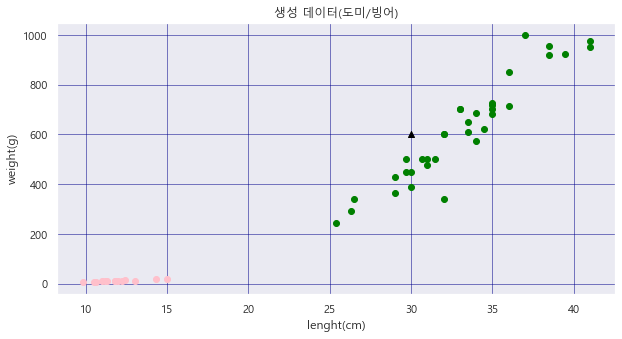

In [67]:
plt.figure(figsize=(10,5))
plt.scatter(x=bream_length,y=bream_weight, color='green')
plt.scatter(x=smelt_length,y=smelt_weight, color='pink')
#의문의 물고기 추가
plt.scatter(x=30.0,y=600.0,marker='^',color='black')
plt.title('생성 데이터(도미/빙어)')
plt.xlabel('lenght(cm)')
plt.ylabel('weight(g)')
plt.grid(color='darkblue',linewidth='0.5')
plt.show()

##### predict

In [45]:
kn.predict([[30,600]])
# 1 도미 0 빙어

array([1])

#### 추가사항

In [50]:
print(kn._fit_X) # 훈련한 생선데이터

[[  25.4  242. ]
 [  26.3  290. ]
 [  26.5  340. ]
 [  29.   363. ]
 [  29.   430. ]
 [  29.7  450. ]
 [  29.7  500. ]
 [  30.   390. ]
 [  30.   450. ]
 [  30.7  500. ]
 [  31.   475. ]
 [  31.   500. ]
 [  31.5  500. ]
 [  32.   340. ]
 [  32.   600. ]
 [  32.   600. ]
 [  33.   700. ]
 [  33.   700. ]
 [  33.5  610. ]
 [  33.5  650. ]
 [  34.   575. ]
 [  34.   685. ]
 [  34.5  620. ]
 [  35.   680. ]
 [  35.   700. ]
 [  35.   725. ]
 [  35.   720. ]
 [  36.   714. ]
 [  36.   850. ]
 [  37.  1000. ]
 [  38.5  920. ]
 [  38.5  955. ]
 [  39.5  925. ]
 [  41.   975. ]
 [  41.   950. ]
 [   9.8    6.7]
 [  10.5    7.5]
 [  10.6    7. ]
 [  11.     9.7]
 [  11.2    9.8]
 [  11.3    8.7]
 [  11.8   10. ]
 [  11.8    9.9]
 [  12.     9.8]
 [  12.2   12.2]
 [  12.4   13.4]
 [  13.    12.2]
 [  14.3   19.7]
 [  15.    19.9]]


In [49]:
print(kn._y) # 훈련한 타겟값 그대로

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0]


#### K-최근접이웃 알고리즘
- K-최근접 이웃 분류 모델
- 최근접으로 사용하는 갯수 5개
- 최근접값 쓸 파라미터를 40개


In [51]:
kn40=KNeighborsClassifier(n_neighbors=40)


In [52]:
kn40.fit(fish_data,fish_target)

KNeighborsClassifier(n_neighbors=40)

In [54]:
kn40.score(fish_data,fish_target)
#1.0 -->0.71

0.7142857142857143

In [56]:
print(35/49)

0.7142857142857143
